# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; Patrick Culliton</p>
# <p style="text-align: right;"> &#9989; PCully03</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, March 29th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:
"
1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will also be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> <font size=6 color="#009600">&#9998;</font> git clone https://github.com/PCully03/cmse202-s24-turnin/tree/hw03_branch

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


---
# Part 2: Loading the datasets (11 points)

In Parts 2-4, you will be working with the world happiness report datasets that are available at https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors.

Note that while Parts 3 and 4 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3 or 4. To get started on Part 2, **you'll need to download the following files**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv`

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above two CSV files in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

``` bash
curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv
curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv
```

&#9989;  **Question 2.2 (4 points)**: Next, load the data in both files into different Pandas DataFrames and display the first and last 5 rows for each frame. 

In [2]:
# Put your code here 
whr_2022 = pd.read_csv('WHR_2022.csv')
whr_2023 = pd.read_csv('WHR_2023.csv')

In [3]:
whr_2022.tail()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
141,Botswana,Sub-Saharan Africa,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,Middle East and North Africa,2.955,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,South Asia,2.404,0.758,0.000,0.289,0.000,0.089,0.005


In [4]:
whr_2023.tail()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027
136,Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [5]:
# Put your code here
whr_2022 = whr_2022.dropna()
whr_2023 = whr_2023.dropna()

&#9989;  **Question 2.4 (3 points)**: Lets do a bit of data analysis with the pandas frames. Display the countries with the top 3% scores (round the number of countries above to an integer) in the `happiness_score` column for 2022 and 2023. Are the countries different between the years?

In [6]:
# Put your code here
top322 = []
happiness_score22 = whr_2022['happiness_score'].sort_values()
len_322 =  round((len(happiness_score22))*0.03)
for i in (range(len_322)):
    top322.append(whr_2022['country'].iloc[i])

In [7]:
print(top322)

['Finland', 'Denmark', 'Iceland', 'Switzerland']


In [8]:
top323 = []
happiness_score23 = whr_2023['happiness_score'].sort_values()
len_323 =  round((len(happiness_score23))*0.03)
for i in (range(len_323)):
    top323.append(whr_2023['country'].iloc[i])

In [9]:
print(top323)

['Finland', 'Denmark', 'Iceland', 'Israel']


In [10]:
print(top323)

['Finland', 'Denmark', 'Iceland', 'Israel']


<font size=6 color="#009600">&#9998;</font> Israel took Switzerland's spot

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear Regression (30 points)

In this part, we'll perform some one-variable linear regression analysis on the world happiness data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `happiness_score` using the `healthy_life_expectancy` column separately for 2022 and 2023 and **display the results summaries** for both years. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [12]:
# Put your code here
#helped by https://gist.github.com/cjtu/78dafb62cb029b84417399823a892237
happy22 = whr_2022['happiness_score']
hle22 = whr_2022['healthy_life_expectancy']
happy23 = whr_2023['happiness_score']
hle23 = whr_2023['healthy_life_expectancy']

const22 = sm.add_constant(hle22)
const23 = sm.add_constant(hle23)

model22 = sm.OLS(happy22, const22)
results22 = model22.fit()

model23 = sm.OLS(happy23, const23)
results23 = model23.fit()

In [13]:
results22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.32e-26
Time:                        21:04:30   Log-Likelihood:                -160.86
No. Observations:                 146   AIC:                             325.7
Df Residuals:                     144   BIC:                             331.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.8791      0.211     13.625      0.000       2.461       3.297
healthy_life_expectancy     4.5626      0.345     13.213      0.000       3.880       5.245
==============================================================================
Omnibus:                       15.012   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.562
Skew:                          -0.732   Prob(JB):                     0.000253
Kurtosis:                       3.759   Cond. No.                         7.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     168.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.71e-25
Time:                        21:04:30   Log-Likelihood:                -155.18
No. Observations:                 136   AIC:                             314.4
Df Residuals:                     134   BIC:                             320.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.5502      0.167     21.280      0.000       3.220       3.880
healthy_life_expectancy     5.4461      0.419     12.995      0.000       4.617       6.275
==============================================================================
Omnibus:                       29.212   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.810
Skew:                          -1.029   Prob(JB):                     4.15e-11
Kurtosis:                       5.050   Cond. No.                         7.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 3.2 (6 points)**: Answer the following questions: 

1. What were the equations of the best fit lines for 2022 and 2023? 

2. Are the slopes and intercepts of the two fitted lines identical (between the 2 years)? Would you use the 2022 model to predict for 2023?

3. Based on the R-squared values for the two cases, how do you think the models fit the data?

In [15]:
b22, m22 = results22.params
b23, m23 = results23.params
print(f'2022 equation: {m22:.3f}x + {b22:.3f}')
print(f'2023 equation: {m23:.3f}x + {b23:.3f}')

2022 equation: 4.563x + 2.879
2023 equation: 5.446x + 3.550


<font size=+3>&#9998;</font> Put your answers here:
It honestly wouldn't be the worst predictor in the world, I would probably use it if I couldn't use the 2023 equation
The R squared value is okay for both of them, 54% in 2022 and 55% in 2023, but it's not over the moon good

&#9989;  **Question 3.3 (6 points)**: Now make scatter plots of `happiness_score` (x-axis) vs. `healthy_life_expectancy` (on y-axis) for 2022 and 2023 on the same plot. Use different colors for the different years. Also plot the best fit lines on the same plot with same colors as the corresponding scatter plots. Label the axes, and add a legend, and give the plot a title.

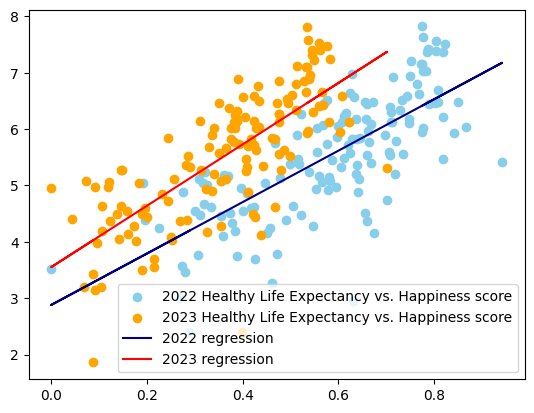

In [16]:
# Put your code here
regress22 = m22 * hle22 + b22
regress23 = m23 * hle23 + b23
plt.scatter(hle22, happy22, c='skyblue', label='2022 Healthy Life Expectancy vs. Happiness score')
plt.scatter(hle23, happy23, c='orange', label='2023 Healthy Life Expectancy vs. Happiness score')
plt.plot(hle22, regress22, c='navy', label='2022 regression')
plt.plot(hle23, regress23, c='red', label='2023 regression')
plt.legend()

&#9989;  **Question 3.4 (2 points)**: In which year are the happiness score predictions generally better?

<font size=+3>&#9998;</font> they're better in 2022

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fits. Make sure to create a large enough figure so that everything is easily visible. Make separate plots for 2022 and 2023.

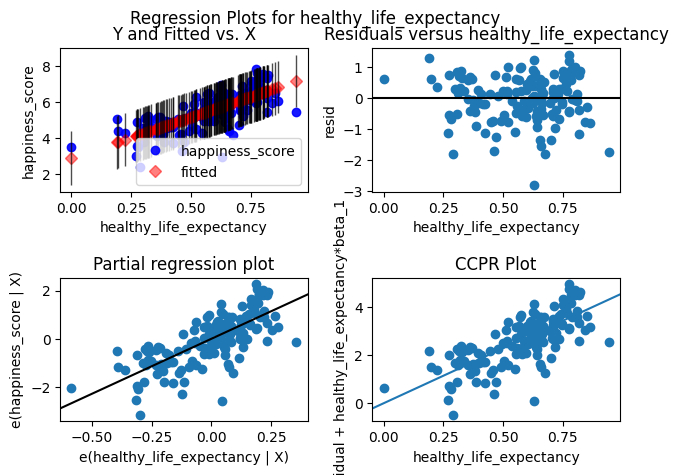

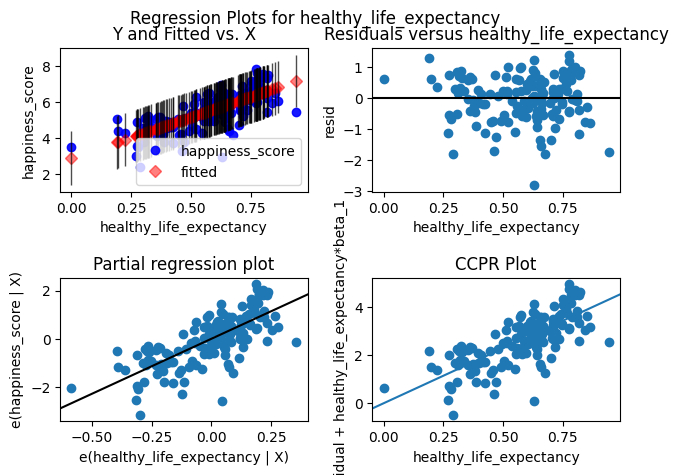

In [17]:
# Put code here.
sm.graphics.plot_regress_exog(results22, 'healthy_life_expectancy')

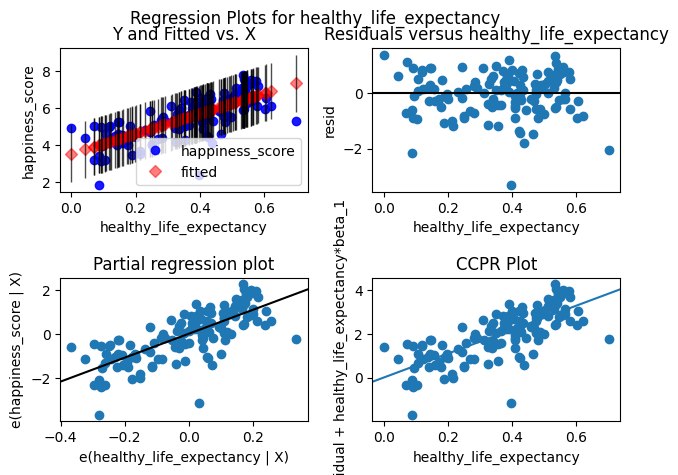

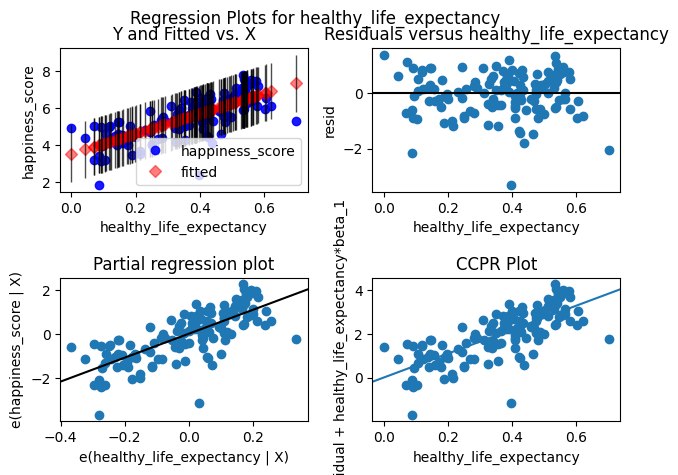

In [18]:
sm.graphics.plot_regress_exog(results23, 'healthy_life_expectancy')

&#9989;  **Question 3.6 (6 points)**: Lets try doing the model fitting again for 2022 and 2023 but only using countries in the `region` column labeled `Western Europe`. Using the `OLS` method in `statsmodels`, perform linear regression to predict `happiness score` based on `healthy_life_expectancy` using only countries in `Western Europe` `region`. Make sure to give the objects and variables different names for this part than the previous part. How do the results compare to Question 3.1? Discuss or compare briefly the observations. You may look at the R-squared values, etc.

In [19]:
# Put your code here
we22 = whr_2022[whr_2022['region'] == 'Western Europe']
we23 = whr_2023[whr_2023['region'] == 'Western Europe']

wehappy22 = we22['happiness_score']
wehle22 = we22['healthy_life_expectancy']
wehappy23 = we22['happiness_score']
wehle23 = we22['healthy_life_expectancy']

weconst22 = sm.add_constant(wehle22)
weconst23 = sm.add_constant(wehle23)

wemodel22 = sm.OLS(wehappy22, weconst22)
weresults22 = wemodel22.fit()

wemodel23 = sm.OLS(wehappy23, weconst23)
weresults23 = model23.fit()

In [20]:
weresults22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8010
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.382
Time:                        21:04:35   Log-Likelihood:                -19.366
No. Observations:                  21   AIC:                             42.73
Df Residuals:                      19   BIC:                             44.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.1147      5.833      2.077      0.052      -0.094      24.323
healthy_life_expectancy    -6.6099      7.385     -0.895      0.382     -22.068       8.848
==============================================================================
Omnibus:                        1.332   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.126
Skew:                          -0.389   Prob(JB):                        0.569
Kurtosis:                       2.173   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
weresults23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     168.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.71e-25
Time:                        21:04:36   Log-Likelihood:                -155.18
No. Observations:                 136   AIC:                             314.4
Df Residuals:                     134   BIC:                             320.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.5502      0.167     21.280      0.000       3.220       3.880
healthy_life_expectancy     5.4461      0.419     12.995      0.000       4.617       6.275
==============================================================================
Omnibus:                       29.212   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.810
Skew:                          -1.029   Prob(JB):                     4.15e-11
Kurtosis:                       5.050   Cond. No.                         7.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size=+3>&#9998;</font> 2022 is objectively worse as it has an r squared value of 4% where 2023 has an r squared value 55%

In [22]:
print('hey')

hey


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to do predictions.

&#9989;  **Question 4.1 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `happiness_score` based on `gdp_per_capita`, `healthy_life_expectancy`, `freedom_to_make_life_choices`, and `generosity`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit models to both the 2022 and 2023 data and display summaries of both results.

In [23]:
# Put your code here
happy22 = whr_2022['happiness_score']
ghfg22 = whr_2022[['gdp_per_capita','healthy_life_expectancy','freedom_to_make_life_choices','generosity']]
happy23 = whr_2023['happiness_score']
ghfg23 = whr_2023[['gdp_per_capita','healthy_life_expectancy','freedom_to_make_life_choices','generosity']]

gconst22 = sm.add_constant(ghfg22)
gconst23 = sm.add_constant(ghfg23)

gmodel22 = sm.OLS(happy22, gconst22)
gresults22 = gmodel22.fit()

gmodel23 = sm.OLS(happy23, gconst23)
gresults23 = gmodel23.fit()

In [24]:
gresults22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           9.94e-38
Time:                        21:04:40   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6786      0.223      7.528      0.000       1.238       2.119
gdp_per_capita                   1.0653      0.208      5.123      0.000       0.654       1.476
healthy_life_expectancy          1.7728      0.480      3.694      0.000       0.824       2.722
freedom_to_make_life_choices     2.1722      0.394      5.515      0.000       1.394       2.951
generosity                       1.4235      0.622      2.288      0.024       0.194       2.653
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.395
Skew:                          -0.776   Prob(JB):                     0.000275
Kurtosis:                       3.533   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
gresults23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     103.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.19e-39
Time:                        21:04:41   Log-Likelihood:                -113.50
No. Observations:                 136   AIC:                             237.0
Df Residuals:                     131   BIC:                             251.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6417      0.229      7.181      0.000       1.189       2.094
gdp_per_capita                   1.1201      0.213      5.259      0.000       0.699       1.541
healthy_life_expectancy          1.8733      0.573      3.270      0.001       0.740       3.007
freedom_to_make_life_choices     2.6733      0.381      7.018      0.000       1.920       3.427
generosity                       1.2924      0.677      1.909      0.058      -0.047       2.632
==============================================================================
Omnibus:                       11.839   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.825
Skew:                          -0.566   Prob(JB):                     0.000995
Kurtosis:                       4.076   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Compared to Question 3.1, are the fits better in Question 4.1? Answer based on e.g., R-squared and Adjusted R-squared values.

2. For each of the features for the year 2023, specify if it is statistically significant or not. Use a p-value threshold of 0.05.

<font size=+3>&#9998;</font> Put your answers here: 1. They're way better! the R squared values are both like 16% higher!!!
2. all of the values are statistically significant except for generosity in 2023

&#9989;  **Question 4.3 (2 points)**: Perform the multivariable linear regression for 2023, but this time with only the **most significant features** (p-values less than 0.05). Display the summary of these results.

In [26]:
# Put your code here
happy23 = whr_2023['happiness_score']
fhfg23 = whr_2023[['gdp_per_capita','healthy_life_expectancy','freedom_to_make_life_choices']]
fconst23 = sm.add_constant(fhfg23)
fmodel23 = sm.OLS(happy23, fconst23)
fresults23 = fmodel23.fit()

In [27]:
fresults23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     134.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           5.61e-40
Time:                        21:04:42   Log-Likelihood:                -115.37
No. Observations:                 136   AIC:                             238.7
Df Residuals:                     132   BIC:                             250.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8216      0.210      8.660      0.000       1.406       2.238
gdp_per_capita                   1.0597      0.213      4.982      0.000       0.639       1.481
healthy_life_expectancy          1.8506      0.578      3.199      0.002       0.706       2.995
freedom_to_make_life_choices     2.8695      0.370      7.746      0.000       2.137       3.602
==============================================================================
Omnibus:                       13.439   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.651
Skew:                          -0.601   Prob(JB):                     0.000242
Kurtosis:                       4.221   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.4 (2 points)**: How much better/worse is the reduced model compared to the original model? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> Put your answers here:
It's actually slightly worse, the r squared went down 0.6% but other than that theres not much change

&#9989;  **Question 4.5 (3 points)**: Create three `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your reduced model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

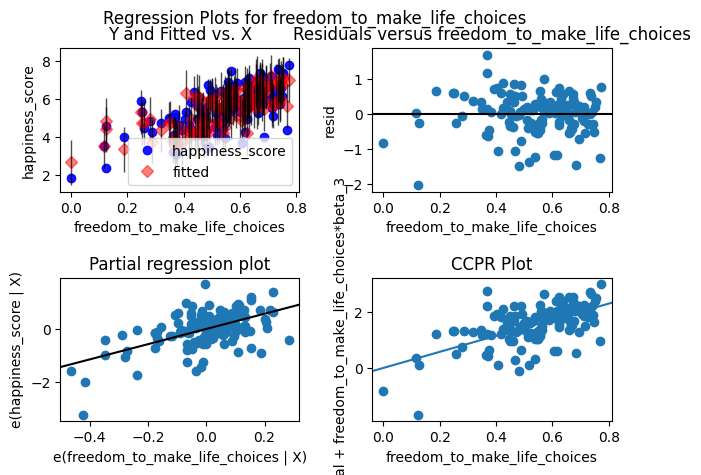

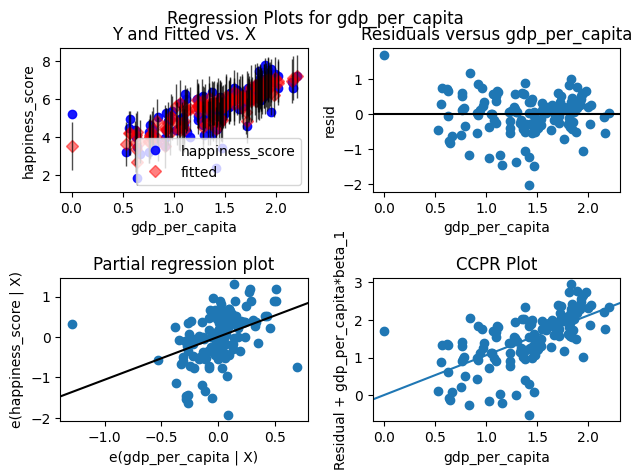

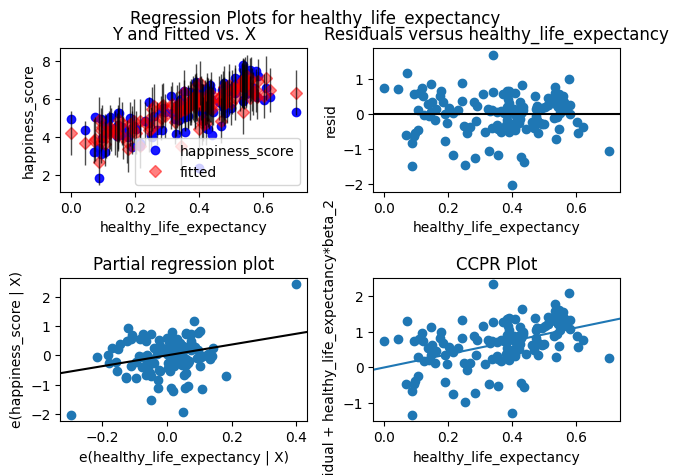

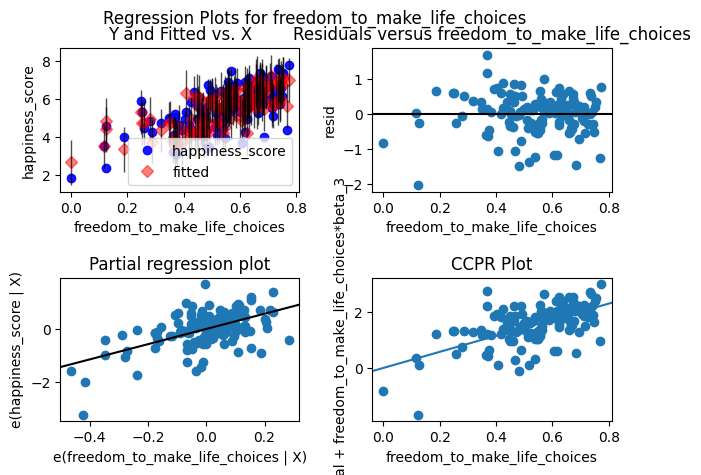

In [28]:
# Put your code here.
sm.graphics.plot_regress_exog(fresults23, 'gdp_per_capita')
sm.graphics.plot_regress_exog(fresults23, 'healthy_life_expectancy')
sm.graphics.plot_regress_exog(fresults23, 'freedom_to_make_life_choices')

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a person has diabetes or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis?select=diabetes.csv. 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [29]:
# Put your code here
!curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23873  100 23873    0     0   232k      0 --:--:-- --:--:-- --:--:--  233k


In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Outcome` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of just the columns `Glucose`, `BloodPressure`, `BMI`, and `Age`. Display the labels and features to make sure you did this correctly.

In [58]:
# Put your code here.
labels = pd.Series(diabetes['Outcome'])
features = pd.DataFrame(diabetes[['Glucose','BloodPressure','BMI','Age']])

In [59]:
labels.tail()

763    0
764    0
765    0
766    1
767    0
Name: Outcome, dtype: int64

In [60]:
features.tail()

,Glucose,BloodPressure,BMI,Age
763,101,76,32.9,63
764,122,70,36.8,27
765,121,72,26.2,30
766,126,60,30.1,47
767,93,70,30.4,23


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
# Put your code here
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, train_size = 0.75, random_state=0)

In [63]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(576, 4)
(192, 4)
(576,)
(192,)


&#9989;  **Question 5.4 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [64]:
# Put your code here
logit_model = sm.Logit(train_labels, sm.add_constant(train_features))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.494514
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.2416
Time:                        22:10:56   Log-Likelihood:                -284.84
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 3.588e-38
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.1149      0.796    -10.192      0.000      -9.675      -6.554
Glucose           0.

&#9989;  **Question 5.5 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [67]:
print("Number of missng values in train_labels:", train_labels.isnull().sum())

Number of missng values in train_labels: 0


In [65]:
# Put your code here
predicted_prob = result.predict(sm.add_constant(train_features))

predicted_classes = (predicted_prob > 0.5).astype(int)

predicted_classes

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Length: 576, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score
#OpenAI ChatGPT-3.5. Accessed on Mar 29, 2024 from https://chat.openai.com/. Prompt chain:{We were going back and forth on an error I got then I said this: 'wait I know what it is, in accuracy_score(test_labels, predicted_classes), it's comparing predicted classes which has a length of 576 to test labels whoch has a length of 192, but you're supposed to compare it to the test data so idk'}
#literally the only part anywhere on this assignment that I used ChatGPT was the predicted_classes[:len(test_labels)]
#I dont think that this is the right solution as it's just taking the last 192 values  of predicted classes so I don't really know how that accurately shows accuracy
accuracy = accuracy_score(test_labels, predicted_classes[:len(test_labels)])

print(accuracy)

0.5729166666666666


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/Z8B1R2tasz" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University